In [1]:
import cv2

In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

model.setInputSize(320, 320)
model.setInputScale(1.0/127.5) # 255 / 2 = 127.5
model.setInputMean((127.5, 127.5, 127.5)) # mobilenet => [-1, 1]
model.setInputSwapRB(True)

< cv2.dnn.Model 0000024EFEC6AD90>

In [4]:
classlabels = []
file_name = 'coco.names'
with open(file_name, 'rt') as fpt:
    classlabels = fpt.read().rstrip('\n').split('\n')

In [5]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
import matplotlib.pyplot as plt

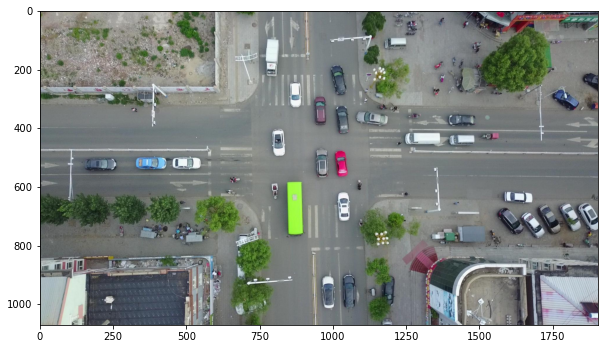

In [7]:
img = cv2.imread('image.jpg')
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [8]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.32)

In [9]:
print(confidence)

[0.5538286  0.5375037  0.4979712  0.46741578 0.46599483 0.4494016
 0.41269758 0.41234273 0.40682793 0.40394795 0.40391073 0.39899158
 0.3948814  0.3879504  0.38660693 0.38545054 0.3795848  0.3788504
 0.37763926 0.37506804 0.37483034 0.36980993 0.369137   0.36235046
 0.3614401  0.36007652 0.3587191  0.35857242 0.3575744  0.35504234
 0.3505151 ]


In [10]:
print(bbox) # x, y, w, h

[[ 317  273   80   42]
 [1744  266   94   68]
 [ 203  272   69   38]
 [ 974  902   64  105]
 [  31    4 1860 1059]
 [1811  267   82   72]
 [ 854  259   49   65]
 [ 980  315   39   85]
 [  58  843  541  228]
 [ 983  925   48   91]
 [1611  679  103   95]
 [1811  267   82   72]
 [ 405  737   48   36]
 [1375  362  133   69]
 [1720  666   73   97]
 [ 974  902   64  105]
 [ 104  267   74   34]
 [1544    3  243   56]
 [ 474  736   59   45]
 [1472    0  183   71]
 [1815  661   72  110]
 [1398  735   94   54]
 [1059  902   52   97]
 [1180  337   37   36]
 [1849  211   55   62]
 [ 854  259   49   65]
 [ 636  562   40   29]
 [1091  337   39   52]
 [1138  748   52   45]
 [1398  735   94   54]
 [1134  928   73  108]]


In [11]:
print(ClassIndex)

[ 3  3  3 14  3  3  3  1  8 14  3  1  3  3  3  3  3  3  3  3  3  8 14  3
  3  1  3  3 64  3 64]


In [12]:
vehicle_count = len(bbox)
vehicle_count

31

In [13]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, "Vehicles: " + str(len(bbox)), (20,50), 0, 2, (100, 0, 100), 3)
    cv2.putText(img, classlabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

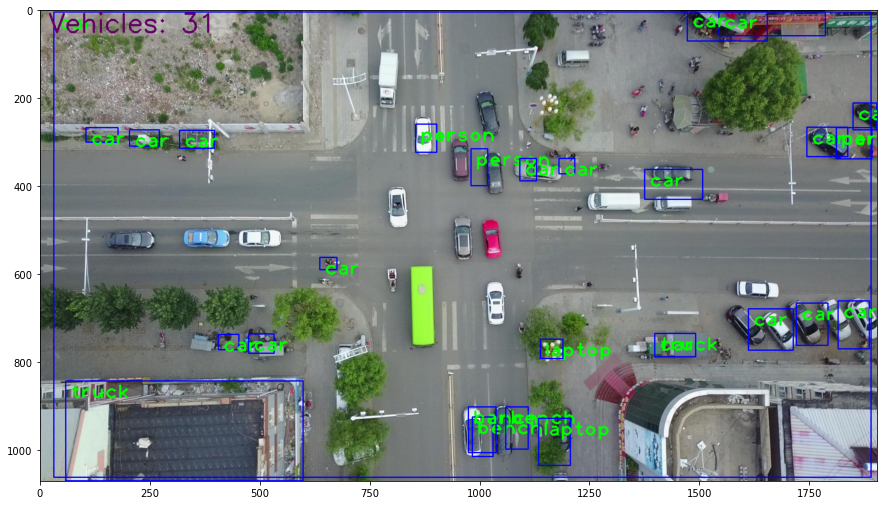

In [14]:
plt.figure(figsize=(15,12))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))